 Correlations matrix of unit(s) (sold,price,costs), total revenue, total profit and total cost

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "SalesRecords.csv"
df = pd.read_csv(file_path)
df

Region                           Country  \
0                      Sub-Saharan Africa                      South Africa   
1            Middle East and North Africa                           Morocco   
2                   Australia and Oceania                  Papua New Guinea   
3                      Sub-Saharan Africa                          Djibouti   
4                                  Europe                          Slovakia   
...                                   ...                               ...   
396531  Central America and the Caribbean  Saint Vincent and the Grenadines   
396532                             Europe                           Romania   
396533                      North America          United States of America   
396534                 Sub-Saharan Africa                            Zambia   
396535                             Europe                            Poland   

         Item Type Sales Channel Order Priority  Order Date   Order ID  \
0           Fruits       Offline              M   7/27/2012  443368995   
1          Clothes        Online              M   9/14/2013  667593514   
2             Meat       Offline              M   5/15/2015  940995585   
3          Clothes       Offline              H   5/17/2017  880811536   
4        Beverages       Offline              L  10/26/2016  174590194   
...            ...           ...            ...         ...        ...   
396531   Household       Offline              C  05/05/2010  428607404   
396532  Vegetables       Offline              C  02/09/2010  282029616   
396533      Fruits        Online              L  02/09/2015  758994615   
396534   Baby Food        Online              M   4/22/2011  112676227   
396535     Clothes        Online              H  01/11/2016  716560781   

         Ship Date  Units Sold  Unit Price  Unit Cost  Total Revenue  \
0        7/28/2012        1593        9.33       6.92       14862.69   
1       10/19/2013        4611      109.28      35.84      503890.08   
2       06/04/2015         360      421.89     364.69      151880.40   
3       07/02/2017         562      109.28      35.84       61415.36   
4       12/04/2016        3973       47.45      31.79      188518.85   
...            ...         ...         ...        ...            ...   
396531   5/19/2010        3310      668.27     502.54     2211973.70   
396532  02/10/2010        7686      154.06      90.93     1184105.16   
396533  03/02/2015        2228        9.33       6.92       20787.24   
396534   5/29/2011        2254      255.28     159.42      575401.12   
396535  02/10/2016        5113      109.28      35.84      558748.64   

        Total Cost  Total Profit  
0         11023.56       3839.13  
1        165258.24     338631.84  
2        131288.40      20592.00  
3         20142.08      41273.28  
4        126301.67      62217.18  
...            ...           ...  
396531  1663407.40     548566.30  
396532   698887.98     485217.18  
396533    15417.76       5369.48  
396534   359332.68     216068.44  
396535   183249.92     375498.72  

[396536 rows x 14 columns]

In [3]:
##matrix of units sold,unit price,unit costs, total revenue, total profit and total cost

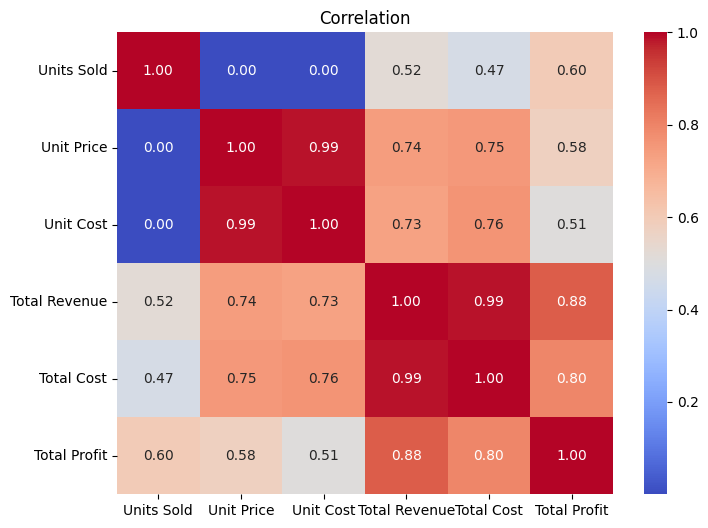

In [30]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue','Total Cost','Total Profit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()

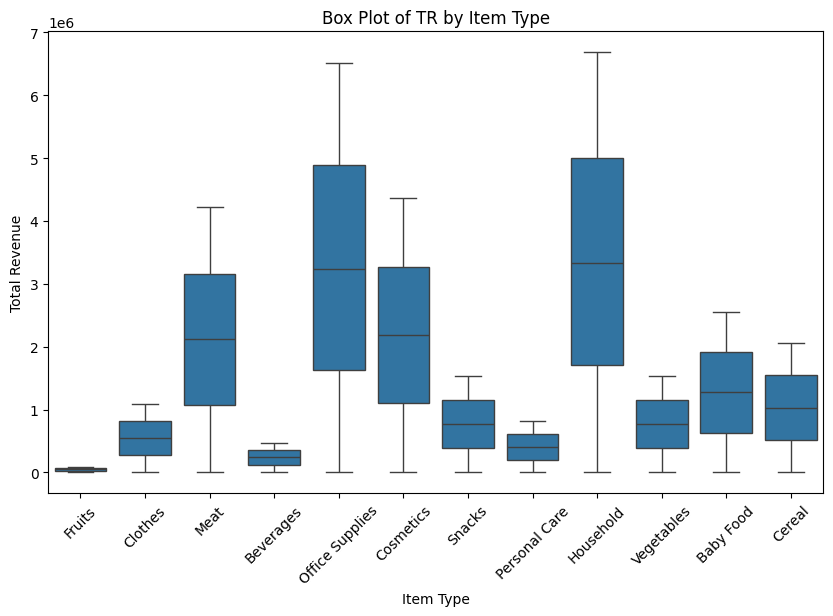

In [7]:
##Box plot of total revenue by item type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item Type', y='Total Revenue', data=df)
plt.title('Box Plot of TR by Item Type')
plt.xticks(rotation=45)
plt.show()

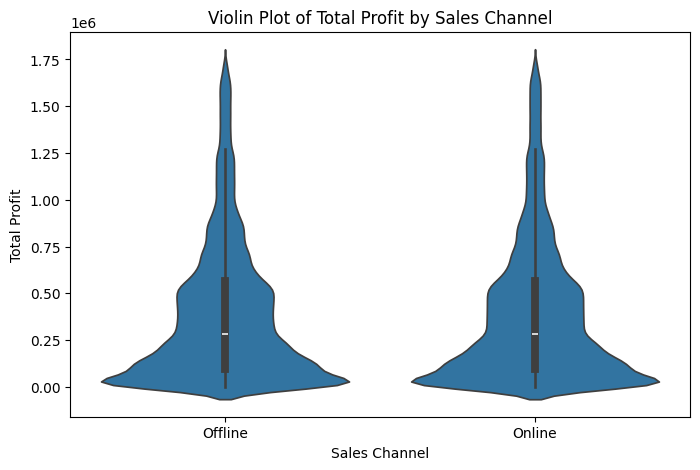

In [8]:
##Violin plot of total profit by sales channel
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Sales Channel', y='Total Profit')
plt.title('Violin Plot of Total Profit by Sales Channel')
plt.show()

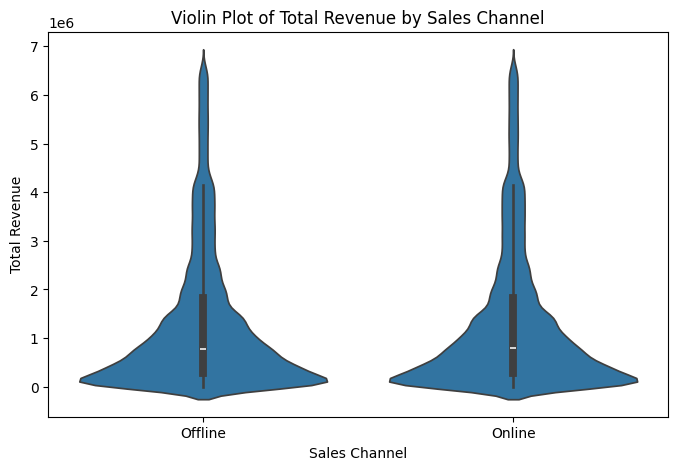

In [9]:
##Violin plot of total revenue by sales channel
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Sales Channel', y='Total Revenue')
plt.title('Violin Plot of Total Revenue by Sales Channel')
plt.show()

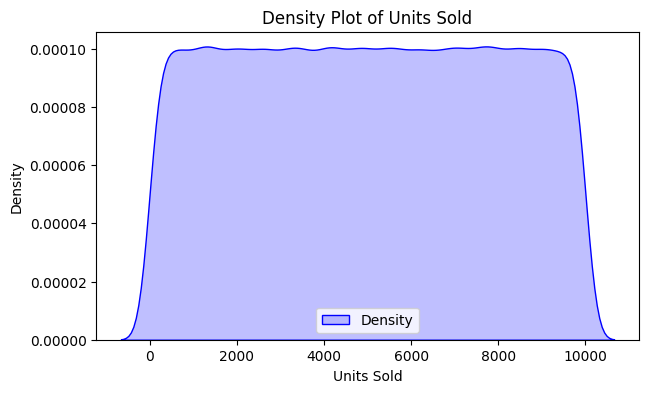

In [15]:
##Density plot of units sold
plt.figure(figsize=(7, 4))
sns.kdeplot(df['Units Sold'], fill=True, color="blue", label="Density")
plt.title('Density Plot of Units Sold')
plt.xlabel('Units Sold')
plt.legend()
plt.show()

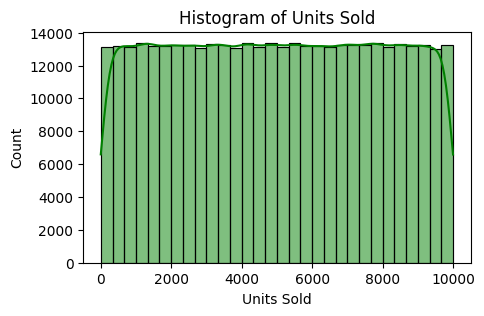

In [16]:
# Histogram of units sold
plt.figure(figsize=(5, 3))
sns.histplot(df['Units Sold'], bins=30, kde=True, color="green")
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.show()

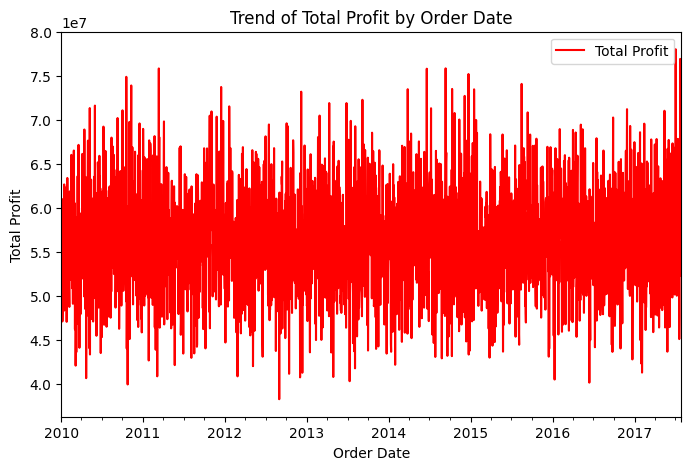

In [18]:
##Trend chart of total profit by order date also a trend chart of units sold by order date
df['Order Date'] = pd.to_datetime(df['Order Date'])
profit_trend = df.groupby('Order Date')['Total Profit'].sum()
units_trend = df.groupby('Order Date')['Units Sold'].sum()

# Plot Total Profit Trend
plt.figure(figsize=(8, 5))
profit_trend.plot(color="red", label="Total Profit")
plt.title("Trend of Total Profit by Order Date")
plt.xlabel("Order Date")
plt.ylabel("Total Profit")
plt.legend()
plt.show()

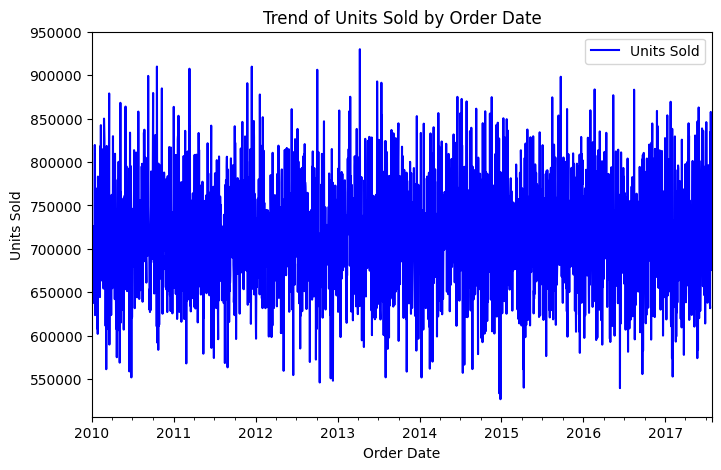

In [20]:
# Plot Units Sold Trend
plt.figure(figsize=(8, 5))
units_trend.plot(color="blue", label="Units Sold")
plt.title("Trend of Units Sold by Order Date")
plt.xlabel("Order Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

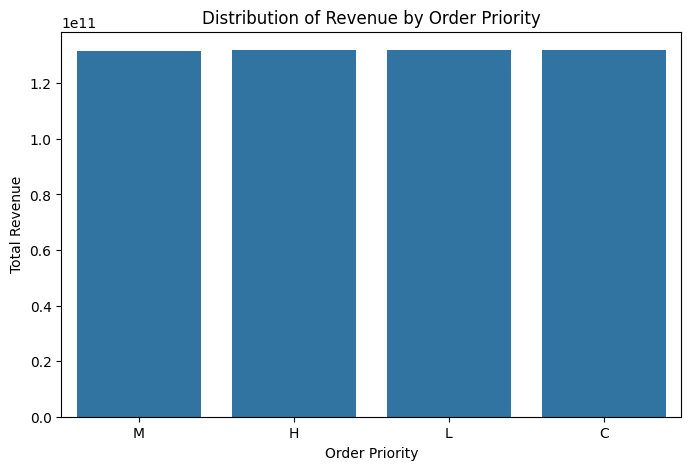

In [34]:
##Distribution of revenue by order priority (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Order Priority', y='Total Revenue', estimator=sum, errorbar=None)
plt.title('Distribution of Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()

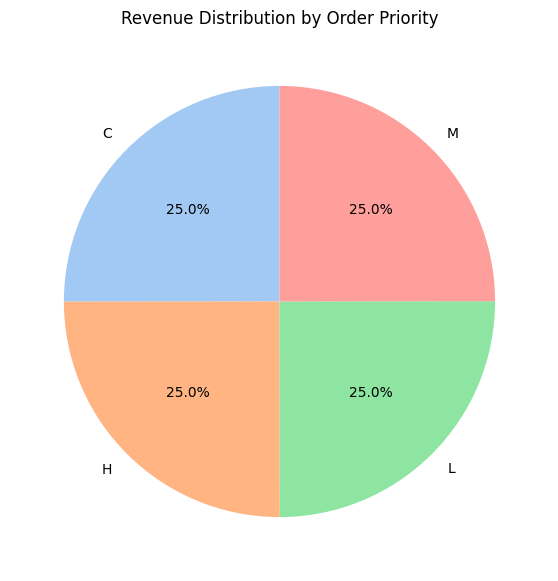

In [26]:
##8. Distribution of revenue by order priority (Pie Chart
revenue_by_priority = df.groupby('Order Priority')['Total Revenue'].sum()
plt.figure(figsize=(7, 7))
plt.pie(revenue_by_priority, labels=revenue_by_priority.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Revenue Distribution by Order Priority')
plt.show()